In [1]:
from  google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


Importing all necessary libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import PercentFormatter
import random

from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.cluster import KMeans
from sklearn.neighbors import KDTree
from sklearn.decomposition import PCA

import re;
import logging;
import sqlite3;
import time;
import sys;
import multiprocessing;
import matplotlib.pyplot as plt;

# Tokenisation & TF-IDF
import spacy #spaCy is a free, open-source library for advanced Natural Language Processing (NLP) in Python.
nlp = spacy.load("en_core_web_sm") #this function is used for lemmization

In [4]:
data = pd.read_csv("/content/drive/MyDrive/IR/assignment2/DATASET/covidvaccine.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
data.head()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,MyNewsNE,Assam,MyNewsNE a dedicated multi-lingual media house...,24-05-2020 10:18,64.0,11.0,110.0,False,18-08-2020 12:55,Australia to Manufacture Covid-19 Vaccine and ...,['CovidVaccine'],Twitter Web App,False
1,Shubham Gupta,NaN,I will tell about all experiences of my life f...,14-08-2020 16:42,1.0,17.0,0.0,False,18-08-2020 12:55,#CoronavirusVaccine #CoronaVaccine #CovidVacci...,"['CoronavirusVaccine', 'CoronaVaccine', 'Covid...",Twitter for Android,False
2,Journal of Infectiology,NaN,Journal of Infectiology (ISSN 2689-9981) is ac...,14-12-2017 07:07,143.0,566.0,8.0,False,18-08-2020 12:46,Deaths due to COVID-19 in Affected Countries\n...,NaN,Twitter Web App,False
3,Zane,NaN,Fresher than you.,18-09-2019 11:01,29.0,25.0,620.0,False,18-08-2020 12:45,@Team_Subhashree @subhashreesotwe @iamrajchoco...,NaN,Twitter for Android,False
4,Ann-Maree O’Connor,"Adelaide, South Australia",Retired university administrator. Melburnian b...,24-01-2013 14:53,83.0,497.0,10737.0,False,18-08-2020 12:45,@michellegrattan @ConversationEDU This is what...,NaN,Twitter Web App,False


In [6]:
#To get the dimesion of the dataset
data.shape

(207006, 13)

In [7]:
#datatype information:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207006 entries, 0 to 207005
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   user_name         207000 non-null  object 
 1   user_location     162416 non-null  object 
 2   user_description  195629 non-null  object 
 3   user_created      207000 non-null  object 
 4   user_followers    206999 non-null  float64
 5   user_friends      206999 non-null  object 
 6   user_favourites   206999 non-null  object 
 7   user_verified     206999 non-null  object 
 8   date              206997 non-null  object 
 9   text              206999 non-null  object 
 10  hashtags          145383 non-null  object 
 11  source            204601 non-null  object 
 12  is_retweet        206992 non-null  object 
dtypes: float64(1), object(12)
memory usage: 20.5+ MB


Data Preprocessing

In [8]:
#To display it in a matrix format
df = pd.DataFrame(data=data.text)
df = df.rename(columns={'text' : 'Tweets'})  #will rename the column for better understanding
df.head()

,Tweets
0,Australia to Manufacture Covid-19 Vaccine and ...
1,#CoronavirusVaccine #CoronaVaccine #CovidVacci...
2,Deaths due to COVID-19 in Affected Countries\n...
3,@Team_Subhashree @subhashreesotwe @iamrajchoco...
4,@michellegrattan @ConversationEDU This is what...


In [9]:
#To see the tweets till limited amount
pd.set_option('max_colwidth',150)
display(df.head(5))

,Tweets
0,Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine
1,#CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https://t.co/kBT7l6pArY
2,Deaths due to COVID-19 in Affected Countries\nRead More: https://t.co/V8Y3Stu0UW\n@r_piryani @shitalbhandary… https://t.co/6jpMxX2KtI
3,@Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https://t.co/ayhoaQm0Ls
4,@michellegrattan @ConversationEDU This is what passes for leadership in our country: a voucher for something that w… https://t.co/OUUb1PeYIj


In [13]:
#saving all the documents in document variable for further preprocessing
documents = data.text.head(1000).values


Data Cleaning

In [14]:
cleaned_data = []
for document in documents:
  temp = re.sub(r':.*$', ":", document)
  cleaned_data.append(temp)

cleaned_data[:10] #displaying first 10 rows

['Australia to Manufacture Covid-19 Vaccine and give it to the Citizens for free of cost: AFP quotes Prime Minister\n#CovidVaccine',
 '#CoronavirusVaccine #CoronaVaccine #CovidVaccine Australia is doing very good https:',
 'Deaths due to COVID-19 in Affected Countries\nRead More: https://t.co/V8Y3Stu0UW\n@r_piryani @shitalbhandary… https:',
 '@Team_Subhashree @subhashreesotwe @iamrajchoco Stay safe @subhashreesotwe di &amp; @iamrajchoco da ❤️❤️… https:',
 '@michellegrattan @ConversationEDU This is what passes for leadership in our country:',
 'The Multi-system Inflammatory Syndrome-Children (MIS-C) w/ #COVID19 (atypical Kawasaki disease) #COVID19India \n\nThe… https:',
 '@PrivilRodrigues @yatish57 @deepkaranahuja @shristi522 @Amrita33392520 @RashmiSriniva14 @AkashRK_88 @SJanaQA… https:',
 '@MSNBC Well, let’s qualify that:',
 'Most countries, without the ability to make #Vaccines locally, will be forced to rely on others like the US, China,… https:',
 '#DNA  zooms up charts in 1st week;

In [16]:
temp = cleaned_data

In [17]:
#preprocessing techniques
#punctuation removing
puncts = '!@#$%^&*(){}{}|;:",./<>?'
for i in puncts:
  temp = np.char.replace(temp, i, ' ')

#remove tags like http &https
temp = np.char.replace(temp,"https:",' ')
temp = np.char.replace(temp,"https",' ')

#removing newline characters
temp = np.char.replace(temp,"\n",' ')

#removing quotes
temp = np.char.replace(temp,"'",' ')

#making lowecase
for i,t in enumerate(temp):
    temp[i] = t.lower()

Data after cleaning

In [18]:
#displaying data
for i in range(25):
       print(f'\ndoc{i}: {temp[i]}') 


doc0: australia to manufacture covid-19 vaccine and give it to the citizens for free of cost  afp quotes prime minister  covidvaccine

doc1:  coronavirusvaccine  coronavaccine  covidvaccine australia is doing very good   

doc2: deaths due to covid-19 in affected countries read more      t co v8y3stu0uw  r_piryani  shitalbhandary…   

doc3:  team_subhashree  subhashreesotwe  iamrajchoco stay safe  subhashreesotwe di  amp   iamrajchoco da ❤️❤️…   

doc4:  michellegrattan  conversationedu this is what passes for leadership in our country 

doc5: the multi-system inflammatory syndrome-children  mis-c  w   covid19  atypical kawasaki disease   covid19india   the…   

doc6:  privilrodrigues  yatish57  deepkaranahuja  shristi522  amrita33392520  rashmisriniva14  akashrk_88  sjanaqa…   

doc7:  msnbc well  let’s qualify that 

doc8: most countries  without the ability to make  vaccines locally  will be forced to rely on others like the us  china …   

doc9:  dna  zooms up charts in 1st week  

In [19]:
#Tf idf has two parts :
#i) Term Frequency (Tf)
# ii) Inverse Document Frequency (idf)
#TfidfVectorizer - Transforms text to feature vectors 

ob = TfidfVectorizer()
vectors = ob.fit_transform(temp[0:10])
feature_names = ob.get_feature_names()
dense = vectors.todense() # gives dense representation.  This basically mean that memory will be allocated to store even the missing values in the dataframe.
denselist = dense.tolist() #convert to list
data = pd.DataFrame(denselist, columns=feature_names)
data

,19,1st,ability,affected,afp,akashrk_88,amp,amrita33392520,and,atypical,australia,be,charts,children,china,citizens,co,conversationedu,coronavaccine,coronavirusvaccine,cost,countries,country,covid,covid19,covid19india,covidvaccine,da,deaths,deepkaranahuja,di,disease,dna,doing,due,episode,for,forced,free,give,...,multi,of,on,others,our,passes,prime,privilrodrigues,qualify,quotes,r_piryani,rashmisriniva14,read,rely,safe,shitalbhandary,shristi522,sjanaqa,stay,subhashreesotwe,syndrome,system,team_subhashree,that,the,this,to,up,us,v8y3stu0uw,vaccine,vaccines,very,week,well,what,will,without,yatish57,zooms
0,0.193108,0.000000,0.000000,0.000000,0.227162,0.000000,0.000000,0.000000,0.227162,0.00000,0.193108,0.000000,0.000000,0.00000,0.000000,0.227162,0.000000,0.000000,0.00000,0.00000,0.227162,0.000000,0.000000,0.193108,0.00000,0.00000,0.193108,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.193108,0.000000,0.227162,0.227162,...,0.00000,0.227162,0.000000,0.000000,0.000000,0.000000,0.227162,0.000000,0.000000,0.227162,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.168947,0.000000,0.337894,0.000000,0.000000,0.000000,0.227162,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.317517,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.37351,0.37351,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.317517,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.37351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.37351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.242643,0.000000,0.000000,0.285432,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.285432,0.000000,0.00000,0.00000,0.000000,0.242643,0.000000,0.242643,0.00000,0.00000,0.000000,0.000000,0.285432,0.000000,0.000000,0.00000,0.000000,0.00000,0.285432,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.285432,0.000000,0.285432,0.000000,0.000000,0.285432,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.212284,0.000000,0.000000,0.285432,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.267261,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.267261,0.000000,0.000000,0.267261,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.267261,0.000000,0.000000,0.000000,0.267261,0.534522,0.00000,0.00000,0.267261,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.316252,0.00000,0.00000,0.000000,0.000000,0.316252,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.268843,0.000000,0.000000,0.000000,...,0.00000,0.000000,0.000000,0.000000,0.316252,0.316252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000

Define Spacy Tokenizer

In [20]:
#documents convert into tokens remove the stopwords punctuations
def spacy_tokenizer(document):
    tokens = nlp(document)
    tokens = [token for token in tokens if (
        token.is_stop == False and \   #to check is a stop word or not
        token.is_punct == False and \
        token.lemma_.strip()!= '')]     #lemmazition - convert the word into base form
    tokens = [token.lemma_ for token in tokens]
    return tokens


Apply Spacy tokenizer, TF-IDF, K-means for our first 1000 tweets

In [21]:
tfidf_vector = TfidfVectorizer(input = 'content', tokenizer = spacy_tokenizer)
corpus = temp

In [22]:
# fit: learns vocabulary and idf
# transform: transforms documents into document-term matrix
result = tfidf_vector.fit_transform(corpus)
result

<1000x3177 sparse matrix of type '<class 'numpy.float64'>'
	with 9169 stored elements in Compressed Sparse Row format>

In [23]:
#Successfully extraxting intended meaning of the limited words.
# We can check which terms are actually considered from the sentences with the get_feature_names method:
tfidf_vector.get_feature_names()[1:500]

['+250',
 '-19',
 '-7',
 '-PRON-',
 '-russia',
 '-strange',
 '0',
 '000',
 '000-',
 '000-mark',
 '002',
 '08',
 '0rv4fjdxdl',
 '0sxpcoua9',
 '1',
 '10',
 '100',
 '1000',
 '100daysofcode',
 '108',
 '109',
 '12',
 '13',
 '14',
 '144',
 '14th',
 '15',
 '15ago',
 '15august',
 '15th',
 '160',
 '17',
 '170',
 '18',
 '19',
 '1947',
 '1986',
 '1mmqsmjfsr',
 '1pgvxzyhky',
 '1st',
 '2',
 '20',
 '200',
 '2016',
 '2017',
 '2018',
 '2020',
 '2020census',
 '2020election',
 '2021',
 '2021z',
 '213',
 '24',
 '25',
 '251',
 '26',
 '29',
 '2nd',
 '2nddynamiteteaser',
 '3',
 '30',
 '31st',
 '32000',
 '330-mil',
 '36',
 '3rd',
 '4',
 '41',
 '42',
 '45',
 '47',
 '47325',
 '489',
 '4e32jz68cj',
 '4gtrial',
 '4humanity',
 '4z6otj68wa',
 '5',
 '50',
 '500',
 '51',
 '51797',
 '52',
 '5hlwkski22',
 '6',
 '60',
 '63',
 '65',
 '66',
 '673166',
 '69',
 '7',
 '71',
 '72',
 '74',
 '74th',
 '74thindependenceday',
 '75',
 '76',
 '8',
 '80',
 '800',
 '8m05lviscp',
 '9',
 '90',
 '900',
 '966',
 'aai_official',
 'aandgsh

In [24]:
# The sparse matrix format is an efficient way to store this information, 
#but we want to convert it to a more readable, dense matrix format using the todense method. 
dense = result.todense()
denselist = dense.tolist()
df = pd.DataFrame(
    denselist,columns=tfidf_vector.get_feature_names())
df

,+,+250,-19,-7,-PRON-,-russia,-strange,0,000,000-,000-mark,002,08,0rv4fjdxdl,0sxpcoua9,1,10,100,1000,100daysofcode,108,109,12,13,14,144,14th,15,15ago,15august,15th,160,17,170,18,19,1947,1986,1mmqsmjfsr,1pgvxzyhky,...,🔬,😀,😁,😂,😃,😅,😆,😇,😊,😋,😎,😏,😐,😒,😓,😔,😕,😜,😝,😤,😭,😳,😴,😷,🙂,🙄,🙋,🙏,🚨,🤐,🤔,🤖,🤣,🤦,🤨,🤭,🥰,🦇,🦰,🧐
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
#randomly choosing the some of the words to see their weights
df[["australia", "manufacture", "covid-19"]]

,australia,manufacture,covid-19
0,0.315362,0.306235,0.154216
1,0.565101,0.000000,0.000000
2,0.000000,0.000000,0.173033
3,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000
...,...,...,...
995,0.000000,0.000000,0.000000
996,0.000000,0.000000,0.000000
997,0.000000,0.000000,0.000000
998,0.000000,0.000000,0.000000


check the cosine similarity

In [27]:
# cosine similarity is used to measure how similar the documents are irrespective of their size.
from sklearn.metrics.pairwise import linear_kernel
cos_df = pd.DataFrame(columns=df.index)
for i in range(999):
    curr_cos_sim = linear_kernel(result[i:i+1], result).flatten()
    cos_df[i] = curr_cos_sim
    
cos_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999
0,1.000000,0.191795,0.026684,0.0,0.000000,0.000000,0.0,0.0,0.013368,0.012323,0.0,0.017106,0.011694,0.008777,0.009800,0.033593,0.059142,0.034952,0.0,0.013216,0.007307,0.009717,0.000000,0.000000,0.007930,0.0,0.0,0.026544,0.000000,0.046777,0.0,0.009121,0.027931,0.014056,0.0,0.014194,0.009619,0.0,0.027600,0.0,...,0.036400,0.012899,0.009694,0.012422,0.011842,0.019080,0.007775,0.022261,0.000000,0.037500,0.012741,0.039620,0.029172,0.008444,0.023395,0.014567,0.000000,0.006245,0.031304,0.000000,0.010522,0.0,0.022903,0.014424,0.0,0.023818,0.052430,0.034063,0.041868,0.042297,0.010864,0.066094,0.000000,0.051016,0.000000,0.006968,0.013656,0.009329,0.009329,NaN
1,0.191795,1.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.030652,0.000000,0.015728,0.017562,0.000000,0.027798,0.000000,0.0,0.000000,0.013094,0.017412,0.000000,0.000000,0.014209,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.016345,0.000000,0.000000,0.0,0.025435,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.021219,0.000000,0.013933,0.016578,0.055511,0.027927,0.000000,0.000000,0.000000,0.015131,0.017423,0.000000,0.000000,0.011191,0.023312,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.016948,0.000000,0.013534,0.013672,0.019468,0.000000,0.000000,0.091417,0.000000,0.012486,0.000000,0.016716,0.016716,NaN
2,0.026684,0.000000,1.000000,0.0,0.080968,0.000000,0.0,0.0,0.073865,0.000000,0.0,0.000000,0.157929,0.000000,0.000000,0.026026,0.000000,0.027080,0.0,0.000000,0.071964,0.000000,0.067769,0.071893,0.000000,0.0,0.0,0.113107,0.018628,0.036241,0.0,0.000000,0.119015,0.000000,0.0,0.000000,0.000000,0.0,0.117603,0.0,...,0.028201,0.000000,0.000000,0.000000,0.000000,0.021408,0.000000,0.000000,0.000000,0.000000,0.108468,0.030696,0.000000,0.000000,0.000000,0.000000,0.000000,0.061505,0.000000,0.000000,0.000000,0.0,0.025698,0.000000,0.0,0.000000,0.126437,0.026391,0.026586,0.026859,0.000000,0.051207,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
3,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.039301,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
4,0.000000,0.000000,0.080968,0.0,1.000000,0.000000,0.0,0.0,0.090498,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.086252,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.006968,0.012486,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.015723,0.155804,0.008068,0.00900

Create the clustering table

In [28]:
from sklearn.cluster import KMeans

In [29]:
#from 2 to 13 cluster we are maintaining dictionary to maintain each cluster kmeans value
kmeans_models = {}
for i in range(2,13+1):
    current_kmean = KMeans(n_clusters=i).fit(result)
    kmeans_models[i] = current_kmean

In [30]:
cluster_df = pd.DataFrame()
cluster_df['Review Texts'] = temp
for i in range(2, 13+1):
    col_name = str(i) +'means_label'
    cluster_df[col_name] = kmeans_models[i].labels_
cluster_df

,Review Texts,2means_label,3means_label,4means_label,5means_label,6means_label,7means_label,8means_label,9means_label,10means_label,11means_label,12means_label,13means_label
0,australia to manufacture covid-19 vaccine and give it to the citizens for free of cost afp quotes prime minister covidvaccine,1,1,3,1,3,3,2,7,2,8,4,7
1,coronavirusvaccine coronavaccine covidvaccine australia is doing very good,0,0,0,0,4,3,2,4,4,7,3,12
2,deaths due to covid-19 in affected countries read more t co v8y3stu0uw r_piryani shitalbhandary…,0,1,3,3,0,2,1,6,3,10,5,10
3,team_subhashree subhashreesotwe iamrajchoco stay safe subhashreesotwe di amp iamrajchoco da ❤️❤️…,0,0,0,0,3,0,0,0,9,1,0,0
4,michellegrattan conversationedu this is what passes for leadership in our country,0,0,0,0,3,0,0,0,9,1,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,phase i ii data on pfizer biontech s mrna covidvaccine it is somewhat alarming how reactogenic it is with high ra…,0,0,2,0,3,3,2,2,4,9,7,12
996,russia s covid vaccine should we be excited is there more than meets the eye when it comes to russia s…,1,2,1,2,5,6,6,8,6,5,10,6
997,anandmahindra please help us spread the word covidwarriors mythandfact covid19india covidvaccine…,0,0,0,0,4,3,2,5,8,7,2,12
998,tehseenp please help us spread the word covidwarriors mythandfact covid19india covidvaccine…,0,0,0,0,4,3,2,5,8,7,2,12


Elbow Method to determine the best K


In [31]:
Sum_of_squared_distances = []
K = range(1,18)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(result)
    Sum_of_squared_distances.append(km.inertia_)

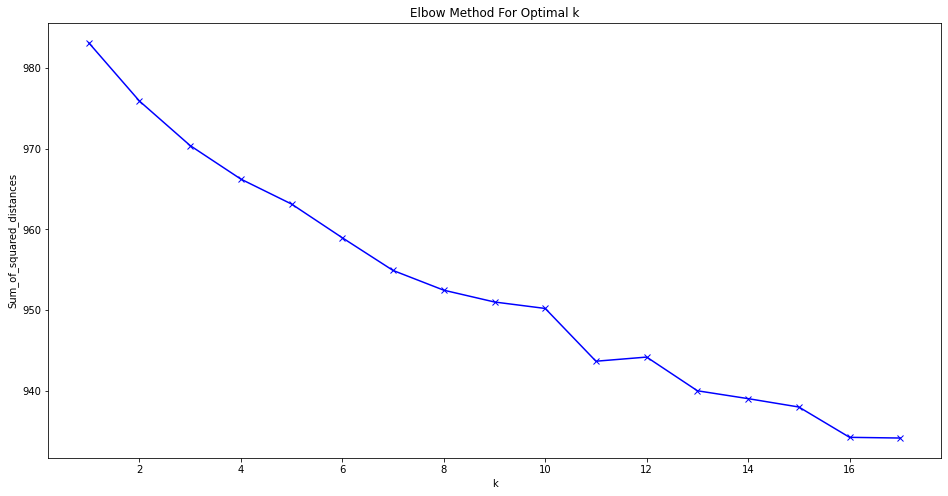

In [32]:
plt.figure(figsize=(16,8))
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

Choose K = 11 to do the experiment

In [34]:
cluster11 = cluster_df.iloc[:,[0,10]]
cluster11_0 = cluster11.loc[cluster11["11means_label"] == 0]
cluster11_0.head(25)

,Review Texts,11means_label
79,president recep tayyip erdoğan and russian president vladimir putin have discussed cooperation on moscow’s recently…,0
144,donaldtrump to putin after covidvaccine 😂😂😂,0
209,the us says no to russia’s approved covidvaccine president trump says ‘we hope it works’ in the past president…,0
245,russia had boldly gone ahead and brought the world s first covid19 vaccine russian president vladimirputin ev…,0
250,russia had boldly gone ahead and brought the world s first covid19 vaccine russian president vladimirputin ev…,0
282,as other countries race to find a covidvaccine russian president vladimir putin announced the first approved vac…,0
323,i did this 😭😭😭 sorry putin 😭 covidvaccine,0
333,funny putin vaccine memes t co rtopjqpzw1 putin putinvaccine putinpuppets vladimirputin…,0
376,after covidvaccine putin successfully invented hiv vaccine too 🙏,0
447,covid19 covidvaccine funny humour russia vaccine putin presidentputin brighton,0


In [35]:
cluster11_1 = cluster11.loc[cluster11["11means_label"] == 1]
cluster11_1.head(25)

,Review Texts,11means_label
3,team_subhashree subhashreesotwe iamrajchoco stay safe subhashreesotwe di amp iamrajchoco da ❤️❤️…,1
4,michellegrattan conversationedu this is what passes for leadership in our country,1
5,the multi-system inflammatory syndrome-children mis-c w covid19 atypical kawasaki disease covid19india the…,1
6,privilrodrigues yatish57 deepkaranahuja shristi522 amrita33392520 rashmisriniva14 akashrk_88 sjanaqa…,1
7,msnbc well let’s qualify that,1
9,dna zooms up charts in 1st week hear vaccines episode,1
13,is more dangerous yet to come covidvaccine corona immunization coronaviruspandemic mutation d614gvirus d614…,1
18,attend webinar on pediatrics neonatology and primarycare conference and get internationalcertificate also…,1
25,🌟 amarujalanews featured me today for being awarded by the prestigious india book of records on pandemic 2020 wor…,1
26,islamabad,1


In [36]:
cluster11_2 = cluster11.loc[cluster11["11means_label"] == 2]
cluster11_2.head(25)

,Review Texts,11means_label
10,biocon executive chairperson kiran mazumdar shaw contracts coronavirus informs on twitter…,2
17,coronavirus updates - american businessman with turkish-armenian roots leads covid-19 vaccine development…,2
21,how will be vaccinate the world vacine vaccinate coronavirus covidvaccine source,2
22,nearly 500 deaths most with the second wave of coronavirus covidvic19 and it s appears that other waves are poss…,2
48,covidvaccine- scare be careful russia and china has itself approved a novel coronavirus vaccine in a similar fas…,2
49,turkey russia discuss cooperation on moscow’s coronavirus vaccine covid19 covidvaccine,2
53,when i see the corona recovery is going better in here covidinengland coronavirus england covidvaccine,2
67,hcq works when given early and or as a preventative measure lancetgate cerb defendthenorth coronavirus…,2
70,more coronavirus vaccine volunteers needed vaccine covid19 covidvaccine,2
85,first time in 5 months today more people are cured than infected from coronavirus is this the beginning of the e…,2


Similarly we can do this for rwmaining clusters also